In [ ]:
# this model tunes for 16 frames:

In [1]:
# adding in the additional dataset to sample from:

import pandas as pd
import numpy as np
import keras 
import glob
import matplotlib.pyplot as plt
from scipy import misc

from sklearn.model_selection import ShuffleSplit, train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D #, Convolution2D - old Keras implementation;
from keras.layers.convolutional import Conv2D
from keras import backend as K
from keras.utils import np_utils
import scipy.stats as sp


Using TensorFlow backend.


In [2]:
path = "Analysis/Data/Curb/*.jpg"
path2 = "Analysis/Data/noCurb/*.jpg"

counter = 0

curb_data = [] # instantiate a list to store all of these values in

curb_labels = [] # instantiate a list to store the labels of the data

for fname in glob.glob(path):
    #print(fname)
    pic = misc.imread(fname)
    #print( pic.shape, type(pic))
    #print(counter)
    curb_data.append(pic)
    counter += 1
    curb_labels.append(1)
    #plt.imshow(pic)
    #plt.show()
    
for fname in glob.glob(path2):
    
    pic = misc.imread(fname)
    curb_data.append(pic)
    counter +=1
    curb_labels.append(0)
    
    
curb_data = np.array(curb_data)   
curb_labels = np.array(curb_labels)

In [3]:
print(curb_data.shape)

print(curb_labels.shape)
print(np.amax(curb_labels))
print(np.amin(curb_labels))
print(curb_labels.size)
# remember: record count, rows, columns, color dim, classification

(6052, 100, 100, 3)
(6052,)
1
0
6052


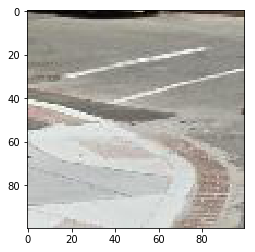

In [4]:
# test image integrity 
plt.imshow(curb_data[10])
plt.show()

In [5]:
# Create training and test split arrays:

# just do an 80/20 test/train split for the time being, then can go do better cross validation later:

X_train, X_test, y_train, y_test = train_test_split(curb_data, curb_labels, test_size = 0.2, random_state = 100)

# check to make sure it everything went smoothly:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4841, 100, 100, 3)
(1211, 100, 100, 3)
(4841,)
(1211,)


In [6]:
# are we getting the correct values? :
print(X_train.min())
print(X_train.max())
print(X_train.dtype) # need to change the data type

# looks good

0
255
uint8


In [7]:
# change the datatype to float:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# normalize the data to a value of 1:
X_train /= 255
X_test /= 255

In [9]:
# just a boolean array:
y_train[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [10]:
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test, 2)

In [11]:
print(y_train.shape)
print(y_test.shape)

(4841, 2)
(1211, 2)


In [12]:
# now create the layers of the neural network:

model = Sequential()

In [13]:
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (100, 100, 3)))

In [14]:
print( model.output_shape)

(None, 98, 98, 32)


In [15]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [16]:
# Now, let's connect the Dense layers: fully connected dense layers
model.add(Flatten())
model.add(Dense(128,activation = 'relu')) # dimensionality of hte output space = 128, relu = rectifed linear unit - 
model.add(Dropout(0.5)) # to prevent overfitting- should we adjust - Larson explain?
model.add(Dense(2, activation = 'softmax'))

In [17]:
# compile the model - define the loss function and optimizer:

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics =['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               9437312   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [ ]:
model.fit(X_train, y_train, batch_size = 32, nb_epoch = 10, verbose = 1)

C:\Users\e93962\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
2784/4841 [================>.............] - ETA: 62s - loss: 5.1778 - acc: 0.6724

In [44]:
score = model.evaluate(X_test, y_test, verbose = 0)
print( 'With a loss of', '%.4f' % score[0], 'we got an accuracy of: ', '%.4f' % score[1] )

With a loss of 1.1645 we got an accuracy of:  0.7638


In [ ]:
# adding in the new model on the frames:

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (100, 100, 3)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu')) # dimensionality of hte output space = 128, relu = rectifed linear unit - 
model.add(Dropout(0.5)) # to prevent overfitting- should we adjust - Larson explain?
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics =['accuracy'])

# show the summary of the model:
model.summary()